# ADIDAS SALES ANALYSIS 

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPPORTING THE DATASET USING PANDAS
adidas = pd.read_excel("Adidas US Sales Dataset ..xlsx", parse_dates=["Invoice Date"])

In [3]:
#TOP 5 ROWS
adidas.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
#REMOVING THE UNNECESSARY COLUMN
adidas.drop(columns="Unnamed: 0", inplace=True)

In [5]:
#LIST OF THE COLUMN NAMES
adidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [6]:
#NUMBER OF ROWS AND COLUMN OF THE DATASET
adidas.shape

(9648, 13)

In [7]:
#CHECKING INFO OF THE DATASET
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
#CHECKING FOR DUPLICATES
adidas.duplicated().sum()

0

In [9]:
#DESCRIPTIVE SUMMARY OF THE NUMERIC COLUMNS
adidas.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [10]:
#CONVERTING THE COLUMNS FROM FLOAT TO INTEGER DATA TYPE
adidas["Price per Unit"] = adidas["Price per Unit"].astype("int32")
adidas["Total Sales"] = adidas["Total Sales"].astype("int32")
adidas["Operating Profit"] = adidas["Operating Profit"].astype("int32")

In [11]:
#CREATING A MONTH COLUMN
adidas["Month"] = adidas["Invoice Date"].dt.month_name()
adidas["Month no"] = adidas["Invoice Date"].dt.month

## UNIVARIATE ANALYSIS 

In [12]:
#COUNT OF EACH UNIQUE VALUE IN RETAILER COLUMN
retailer = adidas["Retailer"].value_counts().reset_index()
retailer = retailer.rename(columns={"index":"Retailer", "Retailer":"Frequency"})
retailer

,Retailer,Frequency
0,Foot Locker,2637
1,West Gear,2374
2,Sports Direct,2032
3,Kohl's,1030
4,Amazon,949
5,Walmart,626


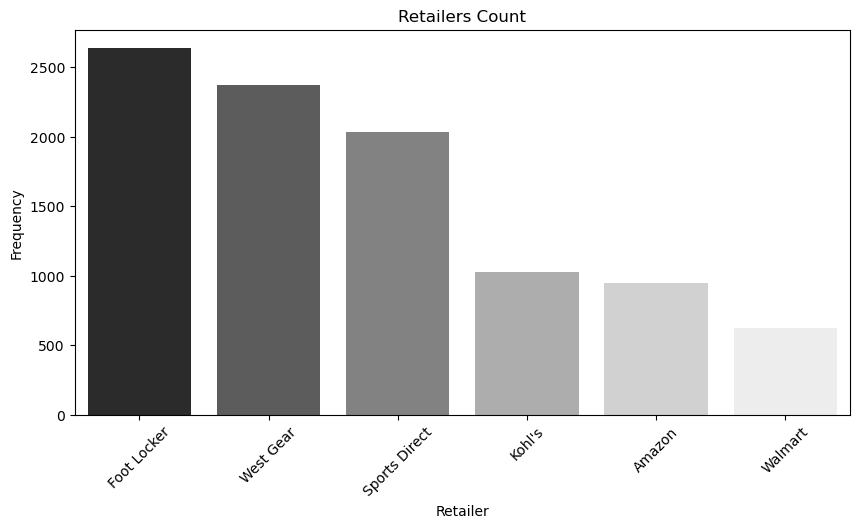

In [13]:
#PLOTTING OF THE RETAILER COLUMN
plt.figure(figsize=(10,5))
palette = sns.color_palette("Greys_r")
sns.barplot(x="Retailer", y="Frequency", data=retailer,palette=palette)
plt.title("Retailers Count")
plt.ylabel("Frequency")
plt.xlabel("Retailer")
plt.xticks(rotation=45)
plt.show()

In [14]:
#COUNT OF EACH UNIQUE VALUE IN MONTH COLUMN
month = adidas[["Month","Month no"]].value_counts().reset_index().sort_values(by="Month no")
month.rename(columns ={0:"Count"}, inplace=True)
month = month.reset_index()
months = month.drop(columns="index")
months

,Month,Month no,Count
0,January,1,861
1,February,2,776
2,March,3,802
3,April,4,841
4,May,5,820
5,June,6,729
6,July,7,774
7,August,8,853
8,September,9,824
9,October,10,814


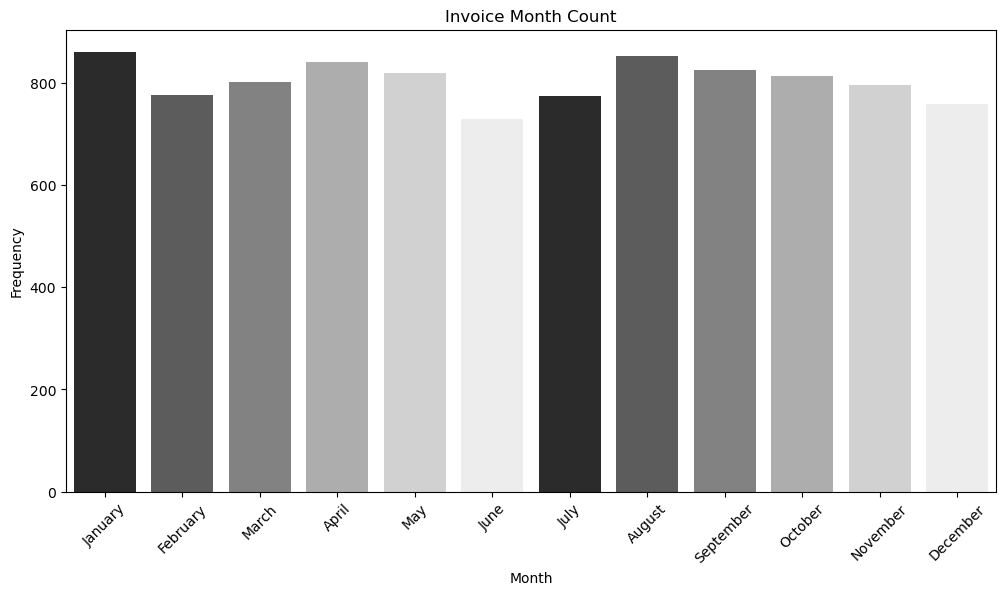

In [15]:
#PLOTTING OF THE MONTH COLUMN
plt.figure(figsize=(12,6))
palette = sns.color_palette("Greys_r")
sns.barplot(x="Month", y="Count", data=months,palette=palette)
plt.title("Invoice Month Count")
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [16]:
#COUNT OF EACH UNIQUE VALUE IN REGION COLUMN
region = adidas["Region"].value_counts().reset_index()
region = region.rename(columns={"index":"Region", "Region":"Frequency"})
region

,Region,Frequency
0,West,2448
1,Northeast,2376
2,Midwest,1872
3,South,1728
4,Southeast,1224


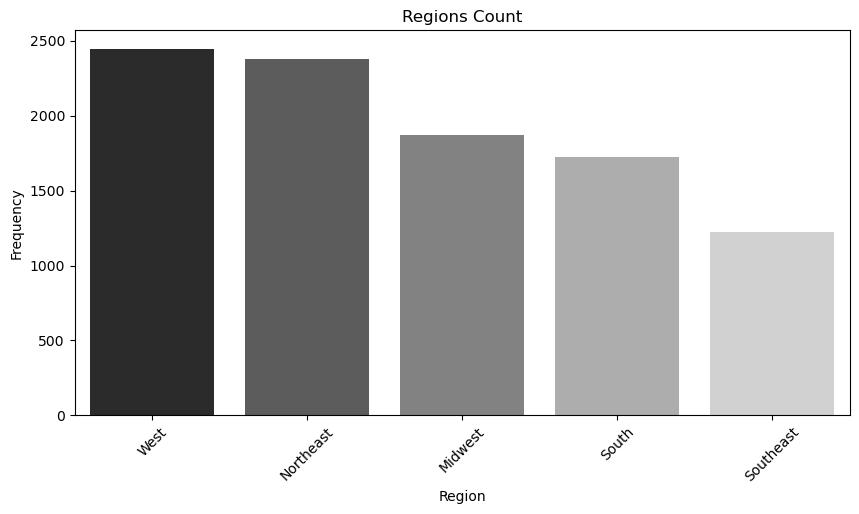

In [17]:
#PLOT OF THE REGION COLUMN
plt.figure(figsize=(10,5))
palette = sns.color_palette("Greys_r")
sns.barplot(x="Region", y="Frequency", data=region,palette=palette)
plt.title("Regions Count")
plt.ylabel("Frequency")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [18]:
#COUNT OF EACH UNIQUE VALUE IN PRODUCT COLUMN
product = adidas["Product"].value_counts().reset_index()
product = product.rename(columns={"index":"Product", "Product":"Frequency"})
product

,Product,Frequency
0,Men's Street Footwear,1610
1,Men's Athletic Footwear,1610
2,Women's Street Footwear,1608
3,Women's Apparel,1608
4,Women's Athletic Footwear,1606
5,Men's Apparel,1606


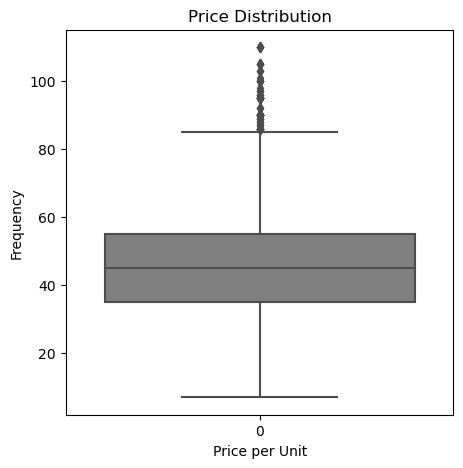

In [19]:
#CHECKING THE PRESENCE OF OUTLIERS USING A BOXPLOT
plt.figure(figsize=(5,5))
sns.boxplot(adidas["Price per Unit"], color="grey")
plt.title("Price Distribution")
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")
plt.show()

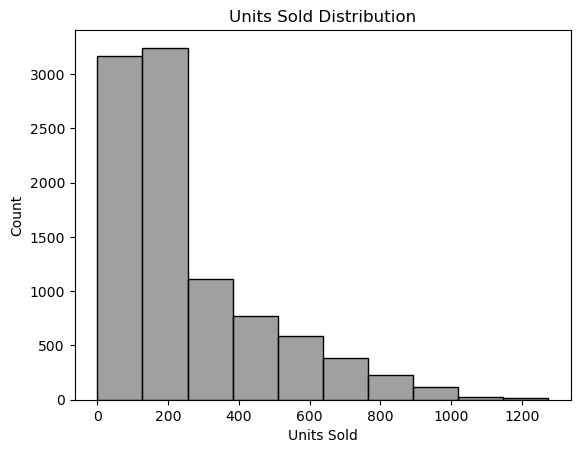

In [20]:
#HISTOGRAM SHOWING THE DISTRIBUTION OF "UNIT SOLD" COLUMN
sns.histplot(x="Units Sold", data=adidas, bins=10, color="grey")
plt.title("Units Sold Distribution")
plt.show()

In [21]:
#COUNT OF EACH UNIQUE VALUE IN "SALES METHOD" COLUMN
adidas["Sales Method"].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

## INSIGHTS 

### MONTHLY TREND OF SALES

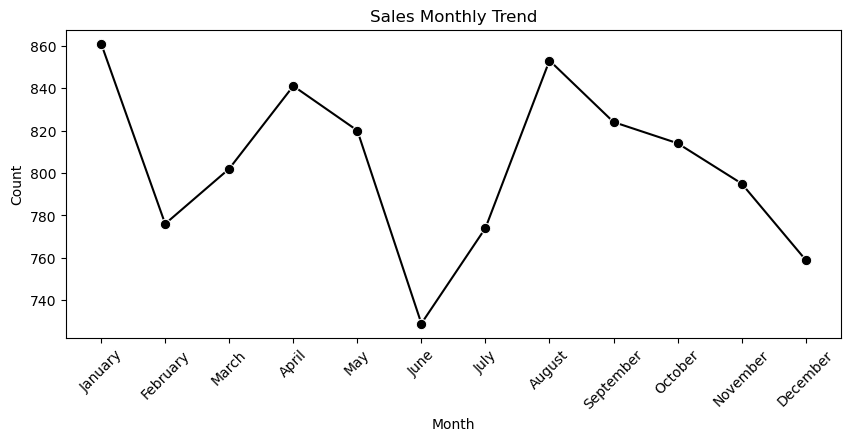

In [22]:
plt.figure(figsize=(10,4))
sns.lineplot(x="Month", y="Count", data=months,color="Black", sort=False, marker=".", markersize=15)
plt.title("Sales Monthly Trend")
plt.xticks(rotation=45)
plt.show()

### RETAILERS ANALYSIS

In [23]:
#TOTAL SALES FROM EACH PRODUCT BY RETAILERS
top = adidas.groupby(["Retailer", "Product"])["Total Sales"].sum().reset_index()
top = top.sort_values(by=["Product", "Total Sales"], ascending=[True, False])
top = top.reset_index()
top.drop(columns="index", inplace=True)
top

,Retailer,Product,Total Sales
0,West Gear,Men's Apparel,33263920
1,Foot Locker,Men's Apparel,29508956
2,Sports Direct,Men's Apparel,24825263
3,Kohl's,Men's Apparel,14164953
4,Walmart,Men's Apparel,11490677
5,Amazon,Men's Apparel,10474760
6,West Gear,Men's Athletic Footwear,42805849
7,Foot Locker,Men's Athletic Footwear,36480412
8,Sports Direct,Men's Athletic Footwear,30889733
9,Kohl's,Men's Athletic Footwear,17885316


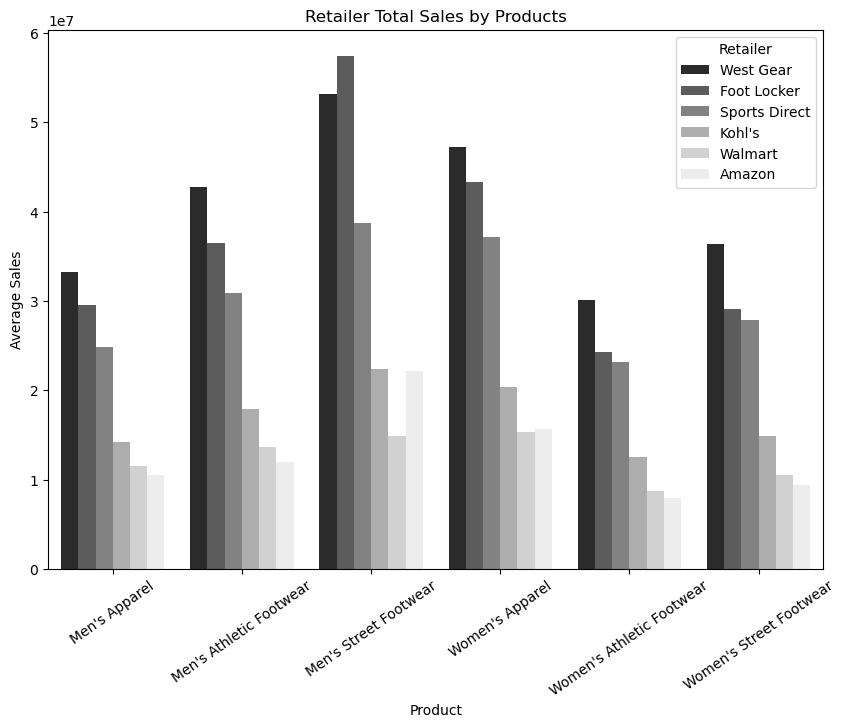

In [35]:
plt.figure(figsize=(10,7))
palette = sns.color_palette("Greys_r")
sns.barplot(y="Total Sales", x="Product", hue="Retailer", data=top, palette=palette)
plt.title("Retailer Total Sales by Products")
plt.ylabel("Average Sales")
plt.xticks(rotation=35)
plt.show()

In [25]:
#TOTAL SALES MADE BY EACH RETAILER
adidas.groupby("Retailer")["Total Sales"].sum()

Retailer
Amazon            77698884
Foot Locker      220094606
Kohl's           102114724
Sports Direct    182470917
Walmart           74558401
West Gear        242964261
Name: Total Sales, dtype: int32

In [26]:
#SALES MADE FROM EACH SALES METHOD BY RETAILER
adidas.groupby(["Retailer", "Sales Method"])["Total Sales"].sum()

Retailer       Sales Method
Amazon         In-store         22366246
               Online           28909720
               Outlet           26422918
Foot Locker    In-store         76524940
               Online           72943270
               Outlet           70626396
Kohl's         In-store         29566234
               Online           30992221
               Outlet           41556269
Sports Direct  In-store         55048455
               Online           59225980
               Outlet           68196482
Walmart        In-store         16411249
               Online           15069488
               Outlet           43077664
West Gear      In-store        156726441
               Online           40532132
               Outlet           45705688
Name: Total Sales, dtype: int32


### REGION ANALYSIS 

In [27]:
#TOTAL SALES AND PROFIT MADE FROM EACH REGION
region = adidas.groupby("Region")[["Total Sales","Operating Profit"]].sum().reset_index()
region = region.sort_values(by="Operating Profit", ascending=False).reset_index()
region.drop(columns="index", inplace=True)
region

,Region,Total Sales,Operating Profit
0,West,269943141,89608607
1,Northeast,186323951,68019764
2,South,144663146,61137379
3,Southeast,163171211,60555029
4,Midwest,135800344,52810769


In [28]:
#TOP CITY IN EACH REGION
top_city_region = adidas.groupby(["City","Region"])["Operating Profit"].sum().reset_index()
top_city_region = top_city_region.sort_values(by=["Region","Operating Profit"], ascending=[True,False])
top_city_region = top_city_region.groupby("Region").head(1)
top_city_region = top_city_region.sort_values(by="Operating Profit", ascending=False).reset_index()
top_city_region.drop(columns="index", inplace=True)
top_city_region

,City,Region,Operating Profit
0,New York,Northeast,13899906
1,Miami,Southeast,12168579
2,San Francisco,West,10256188
3,Houston,South,9845075
4,Detroit,Midwest,8135844


In [29]:
#BOTTOM CITY IN EACH REGION
bottom_city_region = adidas.groupby(["City","Region"])["Operating Profit"].sum().reset_index()
bottom_city_region = bottom_city_region.sort_values(by=["Region","Operating Profit"], ascending=[True,True])
bottom_city_region = bottom_city_region.groupby("Region").head(1)
bottom_city_region = bottom_city_region.sort_values(by="Operating Profit", ascending=False).reset_index()
bottom_city_region.drop(columns="index", inplace=True)
bottom_city_region

,City,Region,Operating Profit
0,Oklahoma City,South,4106461
1,Louisville,Southeast,3935789
2,Salt Lake City,West,3873353
3,Baltimore,Northeast,2757592
4,Omaha,Midwest,2439433


### CORRELATION ANALYSIS

In [30]:
#CORRELATION BETWEEN UNITS SOLD AND OPERATING PROFIT
corr = adidas["Units Sold"].corr(adidas["Operating Profit"])
corr

0.8923795697509708

In [31]:
#CORRELATION BETWEEN PRICE AND OPERATING PROFIT
corr = adidas["Price per Unit"].corr(adidas["Operating Profit"])
corr

0.39338861683021686

### SALES METHOD ANALYSIS

In [32]:
#TOTAL SALES AND PROFIT MADE BY EACH SALES METHOD
sales_method = adidas.groupby("Sales Method")[["Total Sales","Operating Profit"]].sum()
sales_method

,Total Sales,Operating Profit
Sales Method,,
In-store,356643565,127590973
Online,247672811,96553370
Outlet,295585417,107987205


<Figure size 1000x700 with 0 Axes>

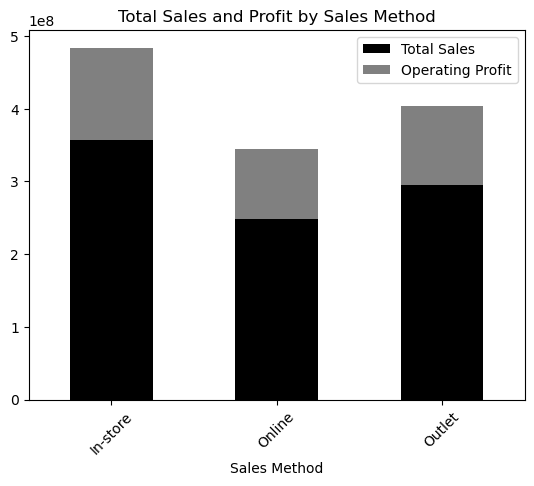

In [33]:
plt.figure(figsize=(10,7))
sales_method.plot(kind="bar", stacked=True, color=["Black", "Grey"])
plt.title("Total Sales and Profit by Sales Method")
plt.xlabel("Sales Method")
plt.xticks(rotation=45)
plt.show()